<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 1.5 Hour </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

<b> Student 1:</b> Oussama Kandakji <br>
<b> Student 2:</b> Bechir Bouali
 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of two students. Each group should fill and run appropriate notebook cells. 

Follow instructions step by step until the end and submit your complete notebook as an archive (tar -cf groupXnotebook.tar DL_lab1/).
Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by March 20th 2019. 

# Introduction

During this lab session, you will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyperparameters. You will use the MNIST dataset which was constructed from scanned documents available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="Nimages/mnist.png" width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get results. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command "from filename import function".

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays;

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots.

Before starting the lab, please launch the cell below. After that, you may not need to do any imports during the lab.

In [1]:
# All imports
from NeuralNetwork import NeuralNetwork
from transfer_functions import *
from utils import *
import numpy as np
import matplotlib

# Section 1 :  Your First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the following neural network with two inputs $x=(x_1,x_2)$, one hidden layer and a single output unit $y$.
The initial weights are set to random values. Neurons 6 and 7 represent biases. Bias values are equal to 1. You will consider a training sample whose feature vector is $x = (0.8, 0.2)$ and whose label is $y = 0.4$.

Assume that neurons have a sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$. The loss function $L$ is a Mean Squared Error (MSE): if $o$ denotes the output of the neural network, then the loss for a given sample $(o, y)$ is $L(o, y) = \left|\left| o - y \right|\right|^2$. In the following, you will assume that if you want to backpropagate the error on a whole batch, you will backpropagate the average error on that batch. More formally, let $((x^{(1)}, y^{(1)}), ..., (x^{(N)}, y^{(N)}))$ be a batch and $o^{(k)}$ the output associated to $x^{(k)}$. Then the total error $\bar{L}$ will be as follows:

<div align="center">$\bar{L} = \frac{1}{N} \sum_{k=1}^{N} L(o^{(k)}, y^{(k)})$.</div>




<img src="Nimages/NN.png" width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass, and the outputs of the neural network before and after the backward path, when the learning rate is $\lambda$=5.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$. Please detail your computations in the cell below and print your answers.

=== FORWARD PASS 1 ===
o = 0.5597295991095776
=== BACKWARD PASS ===
w1_01 = 0.22701658951346695
w1_11 = 0.3216132716107736
w1_21 = 0.8054033179026935
w1_02 = -0.4170920688672122
w1_12 = -0.5136736550937697
w1_22 = 0.19658158622655758
w2_01 = 0.30318727767596393
w2_11 = -0.7270733753139802
w2_21 = 0.3372863608886286
=== FORWARD PASS  0  ===
o = 0.48291466025563257
=== BACKWARD PASS ===
w1_01 = 0.24400263381093104
w1_11 = 0.33520210704874487
w1_21 = 0.8088005267621863
w1_02 = -0.42459297163486226
w1_12 = -0.5196743773078898
w1_22 = 0.19508140567302756
w2_01 = 0.19966496996548172
w2_11 = -0.7949809426827832
w2_21 = 0.3049413624343665
=== FORWARD PASS  1  ===
o = 0.4421448478425721
=== BACKWARD PASS ===
w1_01 = 0.2532430547825961
w1_11 = 0.34259444382607696
w1_21 = 0.8106486109565193
w1_02 = -0.42798164706772873
w1_12 = -0.522385317654183
w1_22 = 0.19440367058645427
w2_01 = 0.14768925026179677
w2_11 = -0.8294086898512271
w2_21 = 0.2888421928761013
=== FORWARD PASS  2  ===
o = 0.42178458899

Text(0,0.5,'Loss')

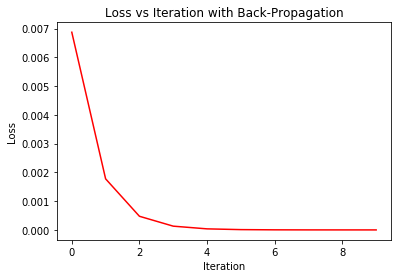

In [2]:
lr = 5.0
x1, x2 = 0.8, 0.2
w1_01, w1_11, w1_21, w1_02, w1_12, w1_22 = 0.2, 0.3, 0.8, -0.4, -0.5, 0.2
w2_01, w2_11, w2_21 = 0.5, -0.6, 0.4
y = 0.4

# Compute the activations in the hidden layer
u1_1=x1*w1_11 + x2*w1_21 + 1*w1_01
u1_2=x1*w1_12 + x2*w1_22 + 1*w1_02

# Compute the outputs of the hidden layer
o1_1 = sigmoid(u1_1)
o1_2 = sigmoid(u1_2)

# Compute the activation of the output neuron
u2_1 =o1_1*w2_11 + o1_2*w2_21 + 1*w2_01

# Compute the output of the output neuron
o2_1 = sigmoid(u2_1)


print("=== FORWARD PASS 1 ===")
print("o =", o2_1)

loss = np.zeros(10)

# Apply back-propagation

for iter in np.arange(10):

    # Partial derivatives of the loss wrt weights of the second layer
    dL_w2_01 = (o2_1-y)*dsigmoid(u2_1)*1
    dL_w2_11 = (o2_1-y)*dsigmoid(u2_1)*o1_1
    dL_w2_21 = (o2_1-y)*dsigmoid(u2_1)*o1_2

    # Partial derivatives of the loss wrt weights of the first layer
    dL_w1_01 = (o2_1-y)*dsigmoid(u2_1)*(w2_11)*dsigmoid(u1_1)*1
    dL_w1_11 = (o2_1-y)*dsigmoid(u2_1)*(w2_11)*dsigmoid(u1_1)*x1
    dL_w1_21 = (o2_1-y)*dsigmoid(u2_1)*(w2_11)*dsigmoid(u1_1)*x2
    dL_w1_02 = (o2_1-y)*dsigmoid(u2_1)*(w2_21)*dsigmoid(u1_2)*1
    dL_w1_12 = (o2_1-y)*dsigmoid(u2_1)*(w2_21)*dsigmoid(u1_2)*x1
    dL_w1_22 = (o2_1-y)*dsigmoid(u2_1)*(w2_21)*dsigmoid(u1_2)*x2

    # Weights updates
    w1_01 -= lr*dL_w1_01
    w1_11 -= lr*dL_w1_11
    w1_21 -= lr*dL_w1_21
    w1_02 -= lr*dL_w1_02
    w1_12 -= lr*dL_w1_12
    w1_22 -= lr*dL_w1_22
    w2_01 -= lr*dL_w2_01
    w2_11 -= lr*dL_w2_11
    w2_21 -= lr*dL_w2_21

    print("=== BACKWARD PASS ===")
    print("w1_01 =", w1_01)
    print("w1_11 =", w1_11)
    print("w1_21 =", w1_21)
    print("w1_02 =", w1_02)
    print("w1_12 =", w1_12)
    print("w1_22 =", w1_22)
    print("w2_01 =", w2_01)
    print("w2_11 =", w2_11)
    print("w2_21 =", w2_21)

    # Compute the activations of the hidden layer after one back-propagation iteration
    u1_1=x1*w1_11 + x2*w1_21 + 1*w1_01
    u1_2=x1*w1_12 + x2*w1_22 + 1*w1_02

    # Compute the activations of the hidden layer after one back-propagation iteration
    o1_1 = sigmoid(u1_1)
    o1_2 = sigmoid(u1_2)

    u2_1 =o1_1*w2_11 + o1_2*w2_21 + 1*w2_01

    o2_1 = sigmoid(u2_1)
    
    loss[iter] = (o2_1-y)**2
    
    print("=== FORWARD PASS ",iter," ===")
    print("o =", o2_1)
    print("==============================================================")
    
matplotlib.pyplot.plot(loss, '-r')
matplotlib.pyplot.title("Loss vs Iteration with Back-Propagation")
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Loss")

<b>Part 2</b>: Neural Network Implementation

In Part 1, you computed weight updates for one sample. This is what we do for the stochastic gradient descent algorithm. However in the rest of the lab, you will be to implement the batch version of the gradient descent.

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py</a> file) and reinitialise weights. 
Then you will need to complete the feedforward() and the backpropagate() functions. 

<b>Question 1.2.1</b>: Implement the feedforward() function.

In [3]:
class NeuralNetwork(NeuralNetwork):
    def feedforward(self, inputs):
        transfer_f = self.transfer_f
        inputs = [x + [1.] for x in inputs]
        self.input = np.array(inputs) # Shape = [batch_size, number_of_input_values+1]
        u_1 = np.dot(self.input,self.W_input_to_hidden)
              # Shape of u_1 should be [batch_size, number_of_neurons_in_hidden_layer]
        self.u_hidden = u_1
        self.o_hidden = np.ones((u_1.shape[0], u_1.shape[1]+1)) # Shape = [batch_size, number_of_hidden_values+1]
        self.o_hidden[:, :-1] = transfer_f(u_1)
        u_2 = np.dot(self.o_hidden,self.W_hidden_to_output)
        self.u_output = u_2
        self.o_output = transfer_f(u_2)

<b>Question 1.2.2</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the feedforward() function you implemented gives the same results as the ones you found by hand.

In [4]:
# First define your neural network
model = NeuralNetwork(2,2,1)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6], [0.4], [0.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Print the output
print("Output =", model.o_output[0,0])

Output = 0.5597295991095776


<b>Question 1.2.3</b>: Implement the backpropagate() function.

In [5]:
class NeuralNetwork(NeuralNetwork):
    def backpropagate(self, targets, learning_rate=5.0):
        transfer_df = self.transfer_df
        l = learning_rate
        targets = np.array(targets) # Target outputs
        
        # Compute the derivative of the loss with respect to the activation in the output layer
        self.dL_du_output = (self.o_output - targets)*(transfer_df(self.u_output))
        
        # Compute the derivative of the loss with respect to the activation in the hidden layer
        self.dL_du_hidden = np.dot(self.dL_du_output,np.transpose(self.W_hidden_to_output[:-1,:]))*(transfer_df(self.u_hidden))
        
        # Compute the partial derivative of loss with respect to weights between the input and the hidden layer
        dW_input_to_hidden = np.dot(np.transpose(self.input),self.dL_du_hidden)
        
        # Compute the partial derivative of loss with respect to weights between the hidden and the output layer
        dW_hidden_to_output = np.dot(np.transpose(self.o_hidden),self.dL_du_output)
        
        # Make updates on the weights
        self.W_hidden_to_output -= l*dW_hidden_to_output/len(targets)
        self.W_input_to_hidden -= l*dW_input_to_hidden/len(targets)

<b>Question 1.2.4</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the backpropagate() function you implemented gives the same weight updates as the ones you found by hand. Do another forward pass and see if the new output is the same as the one you obtained in Question 1.1.1.

In [6]:
##### First define your neural network
model = NeuralNetwork(2,2,1)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3,-0.5],[0.8,0.2],[0.2,-0.4]])
W_hidden_to_output = np.array([[-0.6],[0.4],[0.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Backpropagate
targets = [[0.4]]
model.backpropagate(targets)

# Print weights
print("W_input_to_hidden =", model.W_input_to_hidden)
print("W_hidden_to_output =", model.W_hidden_to_output)

# Feed test values again
model.feedforward(test)

# Print the output
print("Output =", model.o_output)

W_input_to_hidden = [[ 0.32161327 -0.51367366]
 [ 0.80540332  0.19658159]
 [ 0.22701659 -0.41709207]]
W_hidden_to_output = [[-0.72707338]
 [ 0.33728636]
 [ 0.30318728]]
Output = [[0.48291466]]


Checked your implementations and found that everything was fine? Congratulations! You can move to the next section.

# Section 2: Handwritten Digits Recognition

The MNIST dataset consists of handwritten digit images. It is split into a training set containing 60,000 samples and a test set containing 10,000 samples. In this Lab Session, the official training set of 60,000 images is divided into an actual training set of 50,000 samples a validation set of 10,000 samples. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. Images are stored in byte form: you will use the NumPy python library to convert data files into NumPy arrays that you will use to train your Neural Networks.

You will first work with a small subset of MNIST (1000 samples), then on a very small subset of MNIST (10 samples), and eventually run a model on the whole one.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the load_data() function.


In [7]:
# Just run that cell ;-)
training_data, validation_data, test_data = load_data()
small_training_data = (training_data[0][:1000], training_data[1][:1000])
small_validation_data = (validation_data[0][:200], validation_data[1][:200])
indices = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]
vsmall_training_data = ([training_data[0][i] for i in indices], [training_data[1][i] for i in indices])

Loading MNIST data .....
Done.


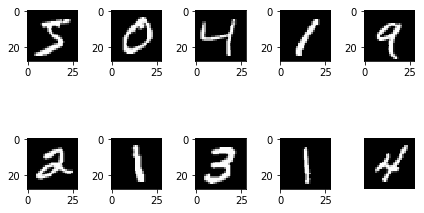

In [8]:
# And you can run that cell if you want to see what the MNIST dataset looks like
ROW = 2
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = np.array(training_data[0][i]).reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

<b>Part 1</b>: Build a bigger Neural Network

The input layer of the neural network that you will build contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits. Thus, the input layer contains 784=28×28 units. The second layer of the network is a hidden layer. We set the number of neurons in the hidden layer to 30. The output layer contains 10 neurons.

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class.

In [9]:
# Define your neural network
mnist_model = NeuralNetwork(input_layer_size = 784, hidden_layer_size = 30, output_layer_size = 10, transfer_f=sigmoid, transfer_df=dsigmoid)

<b>Question 2.1.2</b>: Train your Neural Network on the small subset of MNIST (300 iterations) and print the new accuracy on test data. You will use small_validation_data for validation. Try different learning rates (0.1, 1.0, 10.0). You should use the train() function of the NeuralNetwork class to train your network, and the weights_init() function to reinitialize weights between tests. Print the accuracy of each model on test data using the predict() function.

Training the Neural Network with a 0.1 learning rate and 300 epochs
Training time: 20.75972557067871


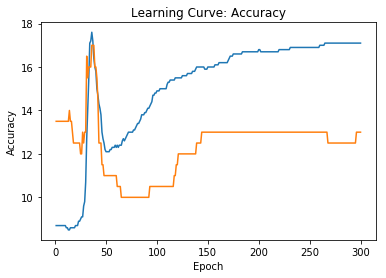


The accuracy of the model on test data is  15.4 %

Training the Neural Network with a 1 learning rate and 300 epochs
Training time: 21.110924243927002


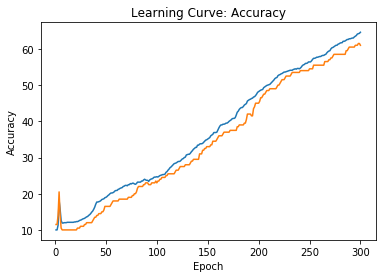


The accuracy of the model on test data is  62.3 %

Training the Neural Network with a 10 learning rate and 300 epochs
Training time: 21.044703483581543


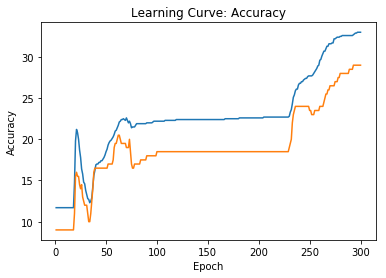


The accuracy of the model on test data is  29.720000000000002 %



In [10]:
# Train NN and print accuracy on test data

# Learning rate 0.1

print("Training the Neural Network with a 0.1 learning rate and 300 epochs")
# Initialize the weights
mnist_model.weights_init()
# Train the model
mnist_model.train(data = small_training_data, validation_data = small_validation_data, iterations=300, learning_rate=0.1, verbose=False)
# Test the model on test data
accuracy = (mnist_model.predict(test_data)/len(test_data[0]))*100
print("\nThe accuracy of the model on test data is ",accuracy,"%\n")
print("===================================================================")

# Learning rate 1.

print("Training the Neural Network with a 1 learning rate and 300 epochs")
# Initialize the weights
mnist_model.weights_init()
# Train the model
mnist_model.train(data = small_training_data, validation_data = small_validation_data, iterations=300, learning_rate=1, verbose=False)
# Test the model on test data
accuracy = (mnist_model.predict(test_data)/len(test_data[0]))*100
print("\nThe accuracy of the model on test data is ",accuracy,"%\n")
print("===================================================================")

# Learning rate 10.

print("Training the Neural Network with a 10 learning rate and 300 epochs")
# Initialize the weights
mnist_model.weights_init()
# Train the model
mnist_model.train(data = small_training_data, validation_data = small_validation_data, iterations=300, learning_rate=10, verbose=False)
# Test the model on test data
accuracy = (mnist_model.predict(test_data)/len(test_data[0]))*100
print("\nThe accuracy of the model on test data is ",accuracy,"%\n")
print("===================================================================")

<b>Question 2.1.3</b>: Do the same with 15 and 75 hidden neurons.

Using a neural network with 15 hidden neurons
Training the Neural Network with a 0.1 learning rate and 300 epochs
Training time: 20.022846460342407


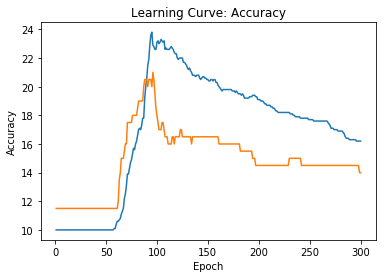

The accuracy of the model on test data is  15.09 %
Training the Neural Network with a 1 learning rate and 300 epochs
Training time: 20.06006908416748


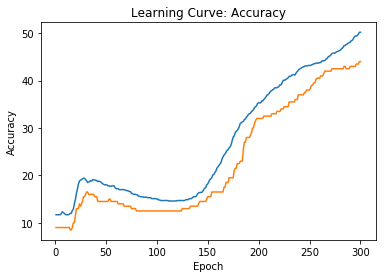

The accuracy of the model on test data is  46.72 %
Training the Neural Network with a 10 learning rate and 300 epochs
Training time: 20.029648780822754


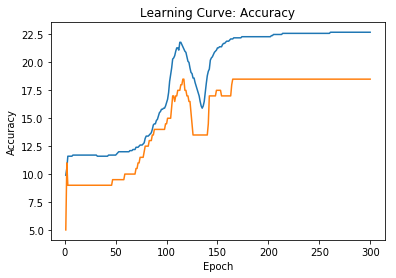

The accuracy of the model on test data is  21.099999999999998 %
Using a neural network with 75 hidden neurons
Training the Neural Network with a 0.1 learning rate and 300 epochs
Training time: 23.80380082130432


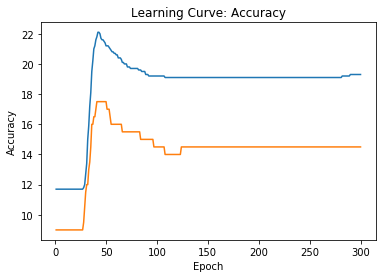

The accuracy of the model on test data is  18.029999999999998 %
Training the Neural Network with a 1 learning rate and 300 epochs
Training time: 23.85907530784607


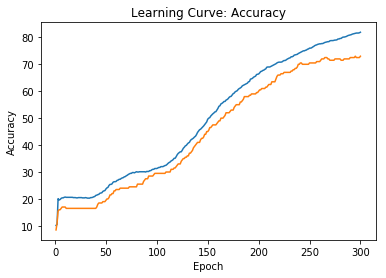

The accuracy of the model on test data is  76.58 %
Training the Neural Network with a 10 learning rate and 300 epochs
Training time: 23.895162343978882


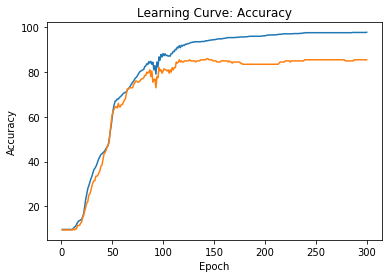

The accuracy of the model on test data is  86.82 %


In [11]:
# Define your neural network

# 15 hidden neurons 
print("===================================================================")
print("Using a neural network with 15 hidden neurons")
print("===================================================================")
mnist_model = NeuralNetwork(input_layer_size = 784, hidden_layer_size = 15, output_layer_size = 10, transfer_f=sigmoid, transfer_df=dsigmoid)

# Learning rate 0.1

print("Training the Neural Network with a 0.1 learning rate and 300 epochs")
# Initialize the weights
mnist_model.weights_init()
# Train the model
mnist_model.train(data = small_training_data, validation_data = small_validation_data, iterations=300, learning_rate=0.1, verbose=False)
# Test the model on test data
accuracy = (mnist_model.predict(test_data)/len(test_data[0]))*100
print("The accuracy of the model on test data is ",accuracy,"%")
print("===================================================================")

# Learning rate 1.

print("Training the Neural Network with a 1 learning rate and 300 epochs")
# Initialize the weights
mnist_model.weights_init()
# Train the model
mnist_model.train(data = small_training_data, validation_data = small_validation_data, iterations=300, learning_rate=1, verbose=False)
# Test the model on test data
accuracy = (mnist_model.predict(test_data)/len(test_data[0]))*100
print("The accuracy of the model on test data is ",accuracy,"%")
print("===================================================================")

# Learning rate 10.

print("Training the Neural Network with a 10 learning rate and 300 epochs")
# Initialize the weights
mnist_model.weights_init()
# Train the model
mnist_model.train(data = small_training_data, validation_data = small_validation_data, iterations=300, learning_rate=10, verbose=False)
# Test the model on test data
accuracy = (mnist_model.predict(test_data)/len(test_data[0]))*100
print("The accuracy of the model on test data is ",accuracy,"%")
print("===================================================================")


# 75 hidden neurons
print("===================================================================")
print("Using a neural network with 75 hidden neurons")
print("===================================================================")
mnist_model = NeuralNetwork(input_layer_size = 784, hidden_layer_size = 75, output_layer_size = 10, transfer_f=sigmoid, transfer_df=dsigmoid)

# Learning rate 0.1

print("Training the Neural Network with a 0.1 learning rate and 300 epochs")
# Initialize the weights
mnist_model.weights_init()
# Train the model
mnist_model.train(data = small_training_data, validation_data = small_validation_data, iterations=300, learning_rate=0.1, verbose=False)
# Test the model on test data
accuracy = (mnist_model.predict(test_data)/len(test_data[0]))*100
print("The accuracy of the model on test data is ",accuracy,"%")
print("===================================================================")

# Learning rate 1.

print("Training the Neural Network with a 1 learning rate and 300 epochs")
# Initialize the weights
mnist_model.weights_init()
# Train the model
mnist_model.train(data = small_training_data, validation_data = small_validation_data, iterations=300, learning_rate=1, verbose=False)
# Test the model on test data
accuracy = (mnist_model.predict(test_data)/len(test_data[0]))*100
print("The accuracy of the model on test data is ",accuracy,"%")
print("===================================================================")

# Learning rate 10.

print("Training the Neural Network with a 10 learning rate and 300 epochs")
# Initialize the weights
mnist_model.weights_init()
# Train the model
mnist_model.train(data = small_training_data, validation_data = small_validation_data, iterations=300, learning_rate=10, verbose=False)
# Test the model on test data
accuracy = (mnist_model.predict(test_data)/len(test_data[0]))*100
print("The accuracy of the model on test data is ",accuracy,"%")
print("===================================================================")
print("===================================================================")

<b>Question 2.1.4</b>: Repeat Questions 2.1.2 and 2.1.3 on the very small datasets. You will use small_validation_data for validation.

Using a neural network with 30 hidden neurons
Training the Neural Network with a 0.1 learning rate and 300 epochs
Training time: 1.7061350345611572


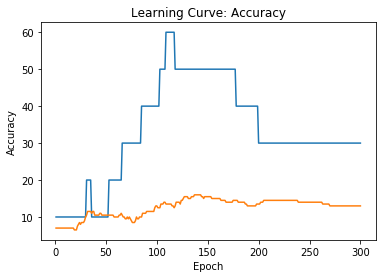

The accuracy of the model on test data is  12.98 %
Training the Neural Network with a 1 learning rate and 300 epochs
Training time: 1.659172773361206


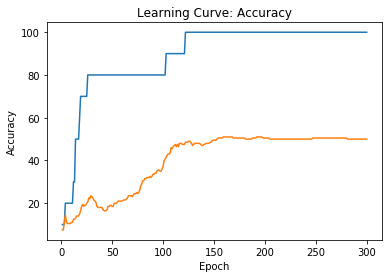

The accuracy of the model on test data is  49.34 %
Training the Neural Network with a 10 learning rate and 300 epochs
Training time: 1.6647670269012451


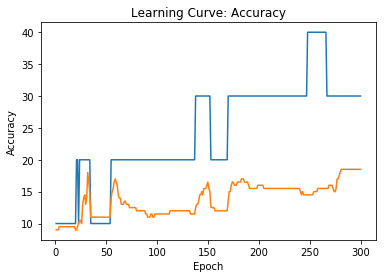

The accuracy of the model on test data is  17.599999999999998 %
Using a neural network with 15 hidden neurons
Training the Neural Network with a 0.1 learning rate and 300 epochs
Training time: 1.5860857963562012


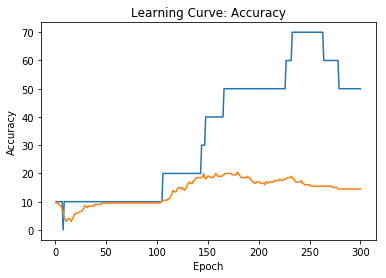

The accuracy of the model on test data is  15.120000000000001 %
Training the Neural Network with a 1 learning rate and 300 epochs
Training time: 1.597435474395752


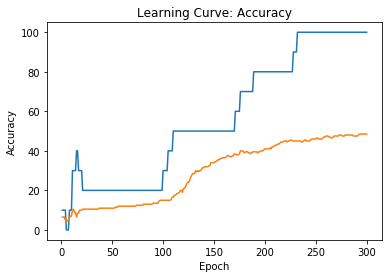

The accuracy of the model on test data is  43.04 %
Training the Neural Network with a 10 learning rate and 300 epochs
Training time: 1.589245080947876


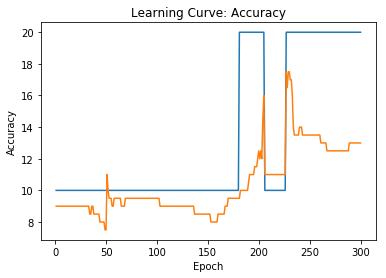

The accuracy of the model on test data is  12.520000000000001 %
Using a neural network with 75 hidden neurons
Training the Neural Network with a 0.1 learning rate and 300 epochs
Training time: 1.9206299781799316


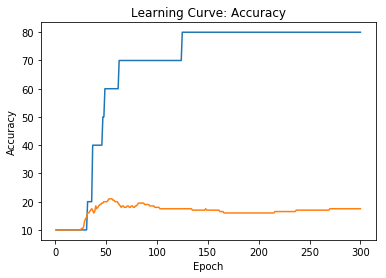

The accuracy of the model on test data is  18.709999999999997 %
Training the Neural Network with a 1 learning rate and 300 epochs
Training time: 1.9298818111419678


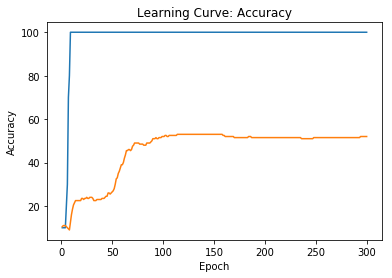

The accuracy of the model on test data is  50.9 %
Training the Neural Network with a 10 learning rate and 300 epochs
Training time: 1.9298171997070312


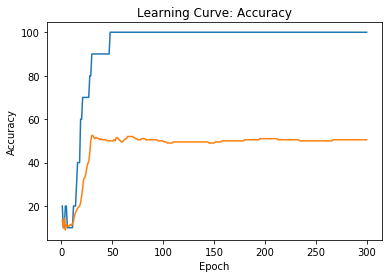

The accuracy of the model on test data is  50.529999999999994 %


In [12]:
# Train NN and print accuracy on test data

# 30 hidden neurons

print("===================================================================")
print("Using a neural network with 30 hidden neurons")
print("===================================================================")
mnist_model = NeuralNetwork(input_layer_size = 784, hidden_layer_size = 30, output_layer_size = 10, transfer_f=sigmoid, transfer_df=dsigmoid)

# Learning rate 0.1

print("Training the Neural Network with a 0.1 learning rate and 300 epochs")
# Initialize the weights
mnist_model.weights_init()
# Train the model
mnist_model.train(data = vsmall_training_data, validation_data = small_validation_data, iterations=300, learning_rate=0.1, verbose=False)
# Test the model on test data
accuracy = (mnist_model.predict(test_data)/len(test_data[0]))*100
print("The accuracy of the model on test data is ",accuracy,"%")
print("===================================================================")

# Learning rate 1.

print("Training the Neural Network with a 1 learning rate and 300 epochs")
# Initialize the weights
mnist_model.weights_init()
# Train the model
mnist_model.train(data = vsmall_training_data, validation_data = small_validation_data, iterations=300, learning_rate=1, verbose=False)
# Test the model on test data
accuracy = (mnist_model.predict(test_data)/len(test_data[0]))*100
print("The accuracy of the model on test data is ",accuracy,"%")
print("===================================================================")

# Learning rate 10.

print("Training the Neural Network with a 10 learning rate and 300 epochs")
# Initialize the weights
mnist_model.weights_init()
# Train the model
mnist_model.train(data = vsmall_training_data, validation_data = small_validation_data, iterations=300, learning_rate=10, verbose=False)
# Test the model on test data
accuracy = (mnist_model.predict(test_data)/len(test_data[0]))*100
print("The accuracy of the model on test data is ",accuracy,"%")
print("===================================================================")
print("===================================================================")

##################################################################################################################################################


# 15 hidden neurons 

print("===================================================================")
print("Using a neural network with 15 hidden neurons")
print("===================================================================")
mnist_model = NeuralNetwork(input_layer_size = 784, hidden_layer_size = 15, output_layer_size = 10, transfer_f=sigmoid, transfer_df=dsigmoid)

# Learning rate 0.1

print("Training the Neural Network with a 0.1 learning rate and 300 epochs")
# Initialize the weights
mnist_model.weights_init()
# Train the model
mnist_model.train(data = vsmall_training_data, validation_data = small_validation_data, iterations=300, learning_rate=0.1, verbose=False)
# Test the model on test data
accuracy = (mnist_model.predict(test_data)/len(test_data[0]))*100
print("The accuracy of the model on test data is ",accuracy,"%")
print("===================================================================")

# Learning rate 1.

print("Training the Neural Network with a 1 learning rate and 300 epochs")
# Initialize the weights
mnist_model.weights_init()
# Train the model
mnist_model.train(data = vsmall_training_data, validation_data = small_validation_data, iterations=300, learning_rate=1, verbose=False)
# Test the model on test data
accuracy = (mnist_model.predict(test_data)/len(test_data[0]))*100
print("The accuracy of the model on test data is ",accuracy,"%")
print("===================================================================")

# Learning rate 10.

print("Training the Neural Network with a 10 learning rate and 300 epochs")
# Initialize the weights
mnist_model.weights_init()
# Train the model
mnist_model.train(data = vsmall_training_data, validation_data = small_validation_data, iterations=300, learning_rate=10, verbose=False)
# Test the model on test data
accuracy = (mnist_model.predict(test_data)/len(test_data[0]))*100
print("The accuracy of the model on test data is ",accuracy,"%")
print("===================================================================")
print("===================================================================")

##################################################################################################################################################


# 75 hidden neurons

print("===================================================================")
print("Using a neural network with 75 hidden neurons")
print("===================================================================")
mnist_model = NeuralNetwork(input_layer_size = 784, hidden_layer_size = 75, output_layer_size = 10, transfer_f=sigmoid, transfer_df=dsigmoid)

# Learning rate 0.1

print("Training the Neural Network with a 0.1 learning rate and 300 epochs")
# Initialize the weights
mnist_model.weights_init()
# Train the model
mnist_model.train(data = vsmall_training_data, validation_data = small_validation_data, iterations=300, learning_rate=0.1, verbose=False)
# Test the model on test data
accuracy = (mnist_model.predict(test_data)/len(test_data[0]))*100
print("The accuracy of the model on test data is ",accuracy,"%")
print("===================================================================")

# Learning rate 1.

print("Training the Neural Network with a 1 learning rate and 300 epochs")
# Initialize the weights
mnist_model.weights_init()
# Train the model
mnist_model.train(data = vsmall_training_data, validation_data = small_validation_data, iterations=300, learning_rate=1, verbose=False)
# Test the model on test data
accuracy = (mnist_model.predict(test_data)/len(test_data[0]))*100
print("The accuracy of the model on test data is ",accuracy,"%")
print("===================================================================")

# Learning rate 10.

print("Training the Neural Network with a 10 learning rate and 300 epochs")
# Initialize the weights
mnist_model.weights_init()
# Train the model
mnist_model.train(data = vsmall_training_data, validation_data = small_validation_data, iterations=300, learning_rate=10, verbose=False)
# Test the model on test data
accuracy = (mnist_model.predict(test_data)/len(test_data[0]))*100
print("The accuracy of the model on test data is ",accuracy,"%")
print("===================================================================")
print("===================================================================")

<b>Question 2.1.5</b>: Explain the results you obtained at Questions 2.1.2, 2.1.3 and 2.1.4.

Answer: ...

<b>Question 2.1.6</b>: Among all the numbers of hidden neurons and learning rates you tried in previous questions, which ones would you expect to achieve best performances on the whole dataset? Justify your answer.

Answer: ...

<b>Question 2.1.7</b>: Train a model with the number of hidden neurons and the learning rate you chose in Question 2.1.6 and print its accuracy on the test set. You will use validation_data for validation. Training can be long on the whole dataset (~40 minutes): we suggest that you work on the optional part while waiting for the training to finish.

In [ ]:
mnist_model = 

<b>Part 2 (optional)</b>: Another loss function

In classification problems, we usually replace the sigmoids in the output layer by a "softmax" function and the MSE loss by a "cross-entropy" loss. More formally, let $u = (u_1, ..., u_n)$ be the vector representing the activation of the output layer of a Neural Network. The output of that neural network is $o = (o_1, ..., o_n) = \textrm{softmax}(u)$, and

<div align="center">$\textrm{softmax}(u) = (\frac{e^{u_1}}{\sum_{k=1}^n e^{u_k}}, ..., \frac{e^{u_n}}{\sum_{k=1}^n e^{u_k}})$.</div>

If $t = (t_1, ..., t_n)$ is a vector of non-negative targets such that $\sum_{k=1}^n t_k = 1$ (which is the case in classification problems, where one target is equal to 1 and all others are equal to 0), then the cross-entropy loss is defined as follows:

<div align="center">$L_{xe}(o, t) = - \sum_{k=1}^n t_k\log(o_k)$.</div>

<b>Question 2.2.1</b>: Let $L_{xe}$ be the cross-entropy loss function and $u_i$, $i \in \lbrace 1, ..., n \rbrace$, be the activations of the output neurons. Let us assume that the transfer function of the output neurons is the softmax function. Targets are $t_1, ..., t_n$. Derive a formula for $\frac{\partial L_{xe}}{\partial u_i}$ (details of your calculations are not required).

Answer: $\frac{\partial L_{xe}}{\partial u_i} = $

<b>Question 2.2.2</b>: Implement a new feedforward() function and a new backpropagate() function adapted to the cross-entropy loss instead of the MSE loss.

In [ ]:
class NeuralNetwork(NeuralNetwork):
    def feedforward_xe(self, inputs):
        pass

    def backpropagate_xe(self, targets, learning_rate=5.0):
        pass

<b>Question 2.2.3</b>: Create a new Neural Network with the same architecture as in Question 2.1.1 and train it using the softmax cross-entropy loss.

In [ ]:
# Define your neural network
mnist_model_xe = 

# Train NN and print accuracy on validation data

In [ ]:
# Print accuracy on test data

<b>Question 2.2.4</b>: Compare your results with the MSE loss and with the cross-entropy loss.

Answer: 

<div align="center"><b>THE END!</b>